In [ ]:
import extract_data.service_ana as sa
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [ ]:
raw_stations: dict = sa.get_telemetric_stations(0,0)
filtered_data: dict = sa.filter_by_uf(raw_stations, 'ES')
stations_df: pd.DataFrame = sa.telemetric_stations_to_df(filtered_data)

In [ ]:
basins: dict = sa.pre_proccess_sub_basins(sa.get_hydrographic_basin(basin=5, sub_basin=None))

sub_basins: dict = { sub_basin["codSubBacia"]: sub_basin["nmSubBacia"] for sub_basin in basins['sub_basins']}

https://telemetriaws1.ana.gov.br/ServiceANA.asmx/HidroBaciaSubBacia?codBacia=5&codSubBacia=


In [ ]:
stations_df.describe()

,NomeEstacao,CodEstacao,Bacia,SubBacia,Operadora,Responsavel,Municipio-UF,Latitude,Longitude,Altitude,CodRio,NomeRio,Origem,StatusEstacao
count,78,78,78,78,78,78,78,78,78,78,78,78,78,78
unique,75,75,1,3,17,17,27,74,73,53,27,27,5,1
top,BOCA DA VALA,55960000,5,57,01059 - STATKRAFT - Statkraft Energias Renováv...,01059 - STATKRAFT - Statkraft Energias Renováv...,ALEGRE-ES,-18.65110,-40.08890,0.00,57400000,RIO ITAPEMIRIM,Setor Elétrico,Ativo
freq,3,3,78,56,16,16,11,3,3,14,9,9,58,78


In [ ]:
number_of_stations = { sub_basins[sub_basin]: stations_df[stations_df["SubBacia"] == sub_basin] for sub_basin in set(stations_df["SubBacia"].to_list())}

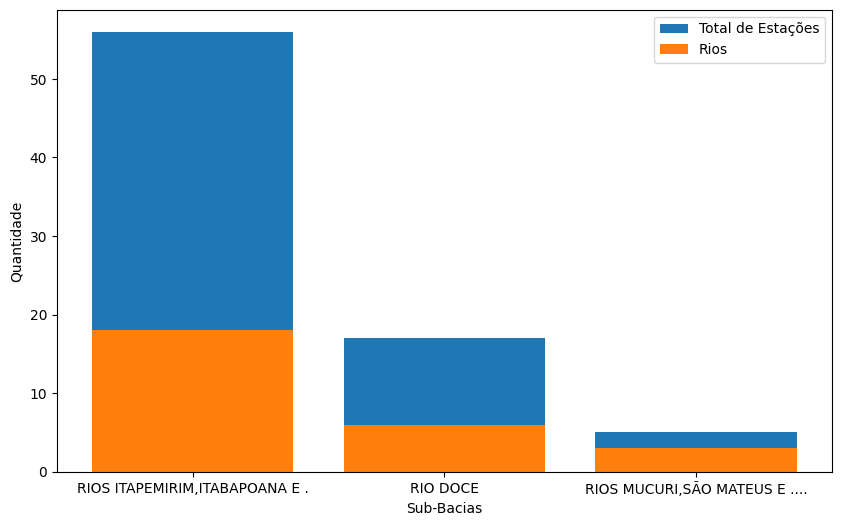

In [ ]:

plt.figure(figsize=(10, 6))  # Set the figure size to 10 inches by 6 inches


plt.bar(number_of_stations.keys(), [len(number_of_stations[sub_basin]) for sub_basin in number_of_stations.keys()], label='Total de Estações')
plt.bar(number_of_stations.keys(), [len(set(number_of_stations[sub_basin]["NomeRio"].to_list())) for sub_basin in number_of_stations.keys()], label="Rios")

plt.xlabel('Sub-Bacias')
plt.ylabel('Quantidade')

plt.legend()

In [ ]:
rivers = {f"{sub_basin} - {sub_basins[sub_basin]}": list(set(number_of_stations[sub_basins[sub_basin]]["NomeRio"].to_list())) for sub_basin in set(stations_df["SubBacia"].to_list())}

# print(rivers)
for key, value in rivers.items():
    print(f"{key}: {value}")

57 - RIOS ITAPEMIRIM,ITABAPOANA E .: ['RIO PARDO', 'RIO FRUTEIRA', 'RIO PRETO', 'RIO BRAÇO NORTE ESQUERDO', 'RIO SANTA MARIA DA VITÓRIA', 'RIO BRAÇO NORTE DIREITO', 'RIO CASTELO', 'RIO ITABAPOANA', 'RIO BENEVENTE', 'RIO IRIRITIMIRIM', 'RIO CALÇADO', 'RIO ITAPEMIRIM', 'RIO DO VEADO', 'RIO JABUTI', 'RIO JUCU - BRAÇO SUL', 'RIO ALEGRE', 'RIO JUCU - BRAÇO NORTE', 'RIO JUCU']
56 - RIO DOCE: ['RIO SANTA MARIA', 'RIO DOCE', 'RIO GUANDU', 'RIO PANCAS', 'RIO SÃO JOSÉ', 'RIO TABOCAS']
55 - RIOS MUCURI,SÃO MATEUS E ....: ['RIO SÃO MATEUS / BRAÇO SUL', 'RIO SÃO MATEUS', 'RIO SÃO MATEUS / BRAÇO NORTE']


In [ ]:
# ESTAÇÕES BACIA DO RIO DOCE
# COLATINA PONTE 56994500 -> Alvo
# DOCE 11 - BAIXO GANDÚ   56338360
# CGH SANTA MARIA   56994100
# DOCE 16 - LINHARES   56338420


# ESTAÇÕES BACIA SÃO MATEUS
# BOCA DA VALA   55960000 -> Alvo
# COTAXÉ   55810000
# CRICARÉ   55885100


In [ ]:
from pprint import pprint

pprint(number_of_stations["RIOS MUCURI,SÃO MATEUS E ...."])

    NomeEstacao CodEstacao Bacia SubBacia  \
0        COTAXÉ   55810000     5       55   
1       CRICARÉ   55885100     5       55   
2  BOCA DA VALA   55960000     5       55   
3  BOCA DA VALA   55960000     5       55   
4  BOCA DA VALA   55960000     5       55   

                                           Operadora  \
0  00082 - CPRM - Cia de Pesquisa de Recursos Min...   
1  00082 - CPRM - Cia de Pesquisa de Recursos Min...   
2  00082 - CPRM - Cia de Pesquisa de Recursos Min...   
3  00082 - CPRM - Cia de Pesquisa de Recursos Min...   
4  00082 - CPRM - Cia de Pesquisa de Recursos Min...   

                               Responsavel   Municipio-UF   Latitude  \
0  00001 - ANA - Agência Nacional de Águas  SÃO MATEUS-ES  -18.62750   
1  00001 - ANA - Agência Nacional de Águas  SÃO MATEUS-ES  -18.65080   
2  00001 - ANA - Agência Nacional de Águas  SÃO MATEUS-ES  -18.65110   
3  00001 - ANA - Agência Nacional de Águas  SÃO MATEUS-ES  -18.65110   
4  00001 - ANA - Agência Naciona

In [ ]:

import extract_data.utils as utils

estacoes_colatina = utils.read_csv_from_directory("./data/Colatina", "Vazão (m3/s)", ["Chuva (mm)", "Nível (cm)"])
estacoes_colatina = utils.pre_proccess_df(estacoes_colatina)
dataset_colatina = utils.join_dataframes(estacoes_colatina, "timestamp")


dataset_colatina.to_csv(f"./dataset_colatina_v2.csv")
dataset_colatina.dropna(inplace=True)
dataset_colatina.describe()

,UHE MASCARENHAS JUSANTE,PCH SAO LUIZ MONTANTE 1,COLATINA PONTE
count,1421.000000,1421.000000,1421.000000
mean,254.664708,8.790091,325.979958
std,90.342159,7.258344,129.426062
min,194.160000,3.910000,149.770000
25%,194.160000,4.890000,248.030000
50%,194.160000,5.940000,298.120000
75%,294.430000,9.410000,361.030000
max,755.930000,53.630000,971.160000


In [ ]:

estacoes_sao_mateus = utils.read_csv_from_directory("./data/São Mateus", "Nível (cm)", ["Chuva (mm)", "Vazão (m3/s)"])
estacoes_sao_mateus = utils.pre_proccess_df(estacoes_sao_mateus)
dataset_sao_mateus = utils.join_dataframes(estacoes_sao_mateus, "timestamp")


dataset_sao_mateus.to_csv(f"./dataset_sao_mateus_v2.csv")
dataset_sao_mateus.dropna(inplace=True)
dataset_sao_mateus.describe()

,COTAXE,CRICARE,BOCA DA VALA
count,5437,5437,5437
unique,94,715,330
top,121,131,82
freq,381,409,296
